In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

import janitor as jn
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-dark-palette')
cmaps = OrderedDict()

In [2]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

In [3]:
df = pd.read_csv('fifa_pca_clusters.csv', index_col=0, low_memory = False)

In [4]:
df_arsenal = df.query('club == "Arsenal" & year == "18/19"')

In [5]:
df_arsenal_pca = df_arsenal[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']].to_numpy()

In [6]:
df_arsenal_pca

array([[-6.90254869, -2.45690475,  2.86099892, -1.85779096,  1.56249666,
        -0.24143026],
       [-5.91872986, -3.67778268,  2.938367  ,  1.99841454,  2.28406386,
         0.1350099 ],
       [ 6.99080274,  0.11614592,  2.62399553, -1.18252606,  4.4650614 ,
         0.04926016],
       [-6.69699707, -2.186092  ,  2.53825721, -1.34110694,  1.35844957,
        -0.41591037],
       [-1.90301733,  4.82597559,  1.55281276, -2.18418622,  1.51874519,
        -0.70476639],
       [-7.18555938, -1.1975474 ,  1.13132419,  0.13656225,  2.1092812 ,
         0.06348549],
       [-3.39583252,  3.90616409,  1.77384462, -0.59856886,  1.32063385,
        -0.12158654],
       [-6.73923704,  0.7160258 ,  1.83511939,  1.10937552,  1.21636282,
        -0.20288524],
       [ 7.65677419, -0.70082404,  3.3314367 ,  0.9145914 ,  3.5418233 ,
         0.02053454],
       [-2.21483835,  4.56578798,  1.02019443, -0.55936974,  1.69356771,
        -0.34372077],
       [-4.81975042,  2.10351016,  3.02509986,  3.

In [7]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(df[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']])

In [8]:
#Using KDTree to find 4 players similar to that of Arsenal Players

dist, idx = kdt.query(df_arsenal_pca, k=5)

In [9]:
idx = idx.flatten()

In [10]:
idx

array([14820, 14889, 15003, 14915, 14908, 14830, 14974, 14859, 14993,
       15204, 14878, 14883, 14897, 14943, 14940, 14889, 15111, 14915,
       14820, 14912, 14898, 14831, 15025, 14843, 14980, 14907, 14903,
       15008, 14913, 15041, 14991, 15135, 15157, 15352, 15700, 14997,
       15527, 15024, 15115, 15239, 15013, 14944, 14909, 15697, 15138,
       15019, 14884, 15083,  9858, 15113, 15078,  9962, 15587, 15995,
       16075, 15148, 17032,    44, 15136, 15470, 15171,     5, 15058,
       16143, 15540, 15201, 15404, 15233, 15600, 15210, 15228, 15201,
       15404,  6407, 15600, 15431, 15285, 15297, 15882, 15445, 15467,
       15613, 16096, 15364, 17551, 15825, 14936, 15748, 16636,  6408,
       15900, 17200, 17675, 10291, 10263, 16711, 10667, 17384, 17540,
       17508, 17816, 17862, 22010, 20312, 23475, 18347, 22452,   244,
        6940, 21828, 20274, 10521, 22576, 19323, 19441, 20763, 25431,
       21302, 11613, 23731, 20847, 19945, 20999, 22850, 21927, 21742,
       22575, 20018,

In [11]:
nn_df = df[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name','club']].iloc[idx]
nn_df

,pc1,pc2,pc3,pc4,pc5,pc6,value_eur,short_name,club
67812,-6.902549,-2.456905,2.860999,-1.857791,1.562497,-0.241430,50500000,P. Aubameyang,Arsenal
67890,-6.696997,-2.186092,2.538257,-1.341107,1.358450,-0.415910,36500000,A. Lacazette,Arsenal
68017,-6.171037,-2.191389,2.401160,-1.984273,1.133113,-0.360958,26000000,C. Bakambu,Beijing Sinobo Guoan FC
67923,-7.082572,-2.466070,2.409195,-1.065906,1.148686,0.023014,35000000,M. Depay,Olympique Lyonnais
67916,-6.772345,-2.345889,1.780103,-1.925966,1.877153,-0.394646,41000000,Gabriel Jesus,Manchester City
67825,-5.918730,-3.677783,2.938367,1.998415,2.284064,0.135010,43500000,M. Özil,Arsenal
67986,-5.936113,-3.278158,2.466489,1.701635,2.090047,0.282756,30000000,Luis Alberto,Lazio
67856,-6.263293,-3.934364,1.930044,2.385647,2.476051,-0.223277,17000000,F. Ribéry,FC Bayern München
68007,-5.679887,-2.746835,1.912474,1.367323,2.226139,0.054532,27000000,E. Forsberg,RB Leipzig
68241,-5.947918,-3.262787,1.696915,2.045924,1.455504,-0.239528,13000000,Nani,Sporting CP


In [12]:
nn_df['transfer'] = ''
nn_df['transfer'][:5] = nn_df['short_name'].iloc[0]
nn_df['transfer'][5:10] = nn_df['short_name'].iloc[5]
nn_df['transfer'][10:15] = nn_df['short_name'].iloc[10]
nn_df['transfer'][15:20] = nn_df['short_name'].iloc[15]
nn_df['transfer'][20:25] = nn_df['short_name'].iloc[20]
nn_df['transfer'][25:30] = nn_df['short_name'].iloc[25]
nn_df['transfer'][30:35] = nn_df['short_name'].iloc[30]
nn_df['transfer'][35:40] = nn_df['short_name'].iloc[35]
nn_df['transfer'][40:45] = nn_df['short_name'].iloc[40]
nn_df['transfer'][45:50] = nn_df['short_name'].iloc[45]
nn_df['transfer'][50:55] = nn_df['short_name'].iloc[50]
nn_df['transfer'][55:60] = nn_df['short_name'].iloc[55]
nn_df['transfer'][60:65] = nn_df['short_name'].iloc[60]
nn_df['transfer'][65:70] = nn_df['short_name'].iloc[65]
nn_df['transfer'][70:75] = nn_df['short_name'].iloc[70]
nn_df['transfer'][75:80] = nn_df['short_name'].iloc[75]
nn_df['transfer'][80:85] = nn_df['short_name'].iloc[80]
nn_df['transfer'][85:90] = nn_df['short_name'].iloc[85]
nn_df['transfer'][90:95] = nn_df['short_name'].iloc[90]
nn_df['transfer'][95:100] = nn_df['short_name'].iloc[95]
nn_df['transfer'][100:105] = nn_df['short_name'].iloc[100]
nn_df['transfer'][105:110] = nn_df['short_name'].iloc[105]
nn_df['transfer'][110:115] = nn_df['short_name'].iloc[110]
nn_df['transfer'][115:120] = nn_df['short_name'].iloc[115]
nn_df['transfer'][120:125] = nn_df['short_name'].iloc[120]
nn_df['transfer'][125:130] = nn_df['short_name'].iloc[125]
nn_df['transfer'][130:135] = nn_df['short_name'].iloc[130]
nn_df['transfer'][135:140] = nn_df['short_name'].iloc[135]
nn_df['transfer'][140:145] = nn_df['short_name'].iloc[140]
nn_df['transfer'][145:150] = nn_df['short_name'].iloc[145]
nn_df['transfer'][150:155] = nn_df['short_name'].iloc[150]
nn_df['transfer'][155:160] = nn_df['short_name'].iloc[155]
nn_df['transfer'][160:165] = nn_df['short_name'].iloc[160]


nn_df

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,pc1,pc2,pc3,pc4,pc5,pc6,value_eur,short_name,club,transfer
67812,-6.902549,-2.456905,2.860999,-1.857791,1.562497,-0.241430,50500000,P. Aubameyang,Arsenal,P. Aubameyang
67890,-6.696997,-2.186092,2.538257,-1.341107,1.358450,-0.415910,36500000,A. Lacazette,Arsenal,P. Aubameyang
68017,-6.171037,-2.191389,2.401160,-1.984273,1.133113,-0.360958,26000000,C. Bakambu,Beijing Sinobo Guoan FC,P. Aubameyang
67923,-7.082572,-2.466070,2.409195,-1.065906,1.148686,0.023014,35000000,M. Depay,Olympique Lyonnais,P. Aubameyang
67916,-6.772345,-2.345889,1.780103,-1.925966,1.877153,-0.394646,41000000,Gabriel Jesus,Manchester City,P. Aubameyang
67825,-5.918730,-3.677783,2.938367,1.998415,2.284064,0.135010,43500000,M. Özil,Arsenal,M. Özil
67986,-5.936113,-3.278158,2.466489,1.701635,2.090047,0.282756,30000000,Luis Alberto,Lazio,M. Özil
67856,-6.263293,-3.934364,1.930044,2.385647,2.476051,-0.223277,17000000,F. Ribéry,FC Bayern München,M. Özil
68007,-5.679887,-2.746835,1.912474,1.367323,2.226139,0.054532,27000000,E. Forsberg,RB Leipzig,M. Özil
68241,-5.947918,-3.262787,1.696915,2.045924,1.455504,-0.239528,13000000,Nani,Sporting CP,M. Özil


In [13]:
nn_df = nn_df.loc[nn_df['club']!='Arsenal']
nn_df

,pc1,pc2,pc3,pc4,pc5,pc6,value_eur,short_name,club,transfer
68017,-6.171037,-2.191389,2.401160,-1.984273,1.133113,-0.360958,26000000,C. Bakambu,Beijing Sinobo Guoan FC,P. Aubameyang
67923,-7.082572,-2.466070,2.409195,-1.065906,1.148686,0.023014,35000000,M. Depay,Olympique Lyonnais,P. Aubameyang
67916,-6.772345,-2.345889,1.780103,-1.925966,1.877153,-0.394646,41000000,Gabriel Jesus,Manchester City,P. Aubameyang
67986,-5.936113,-3.278158,2.466489,1.701635,2.090047,0.282756,30000000,Luis Alberto,Lazio,M. Özil
67856,-6.263293,-3.934364,1.930044,2.385647,2.476051,-0.223277,17000000,F. Ribéry,FC Bayern München,M. Özil
68007,-5.679887,-2.746835,1.912474,1.367323,2.226139,0.054532,27000000,E. Forsberg,RB Leipzig,M. Özil
68241,-5.947918,-3.262787,1.696915,2.045924,1.455504,-0.239528,13000000,Nani,Sporting CP,M. Özil
67884,6.797862,-0.244053,2.481755,-1.220151,4.627056,0.109863,26000000,W. Szczęsny,Juventus,B. Leno
67902,7.102035,-0.284562,2.801905,-1.265803,4.319049,0.018858,19000000,S. Ruffier,AS Saint-Étienne,B. Leno
67952,7.325360,-0.265433,2.781251,-0.932771,4.547424,0.139962,13000000,S. Mandanda,Olympique de Marseille,B. Leno


In [14]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [15]:
df_pca = df[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name','club']]
df_pca = df_pca[df_pca.value_eur != 0]

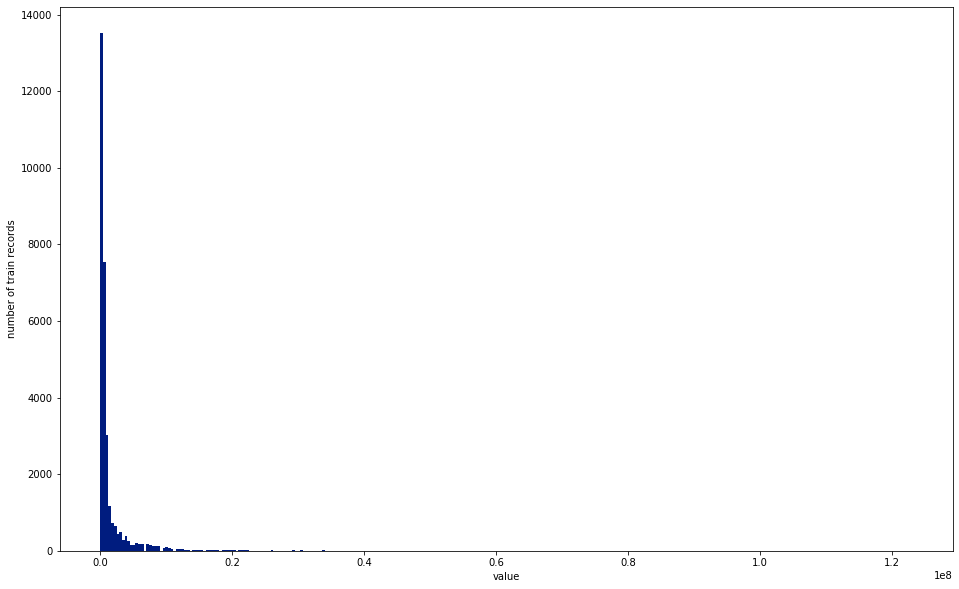

In [16]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_pca['value_eur'], bins=300)
plt.xlabel('value')
plt.ylabel('number of train records')
plt.show()

In [17]:
df_pca['log_value'] = np.log(df_pca[['value_eur']])

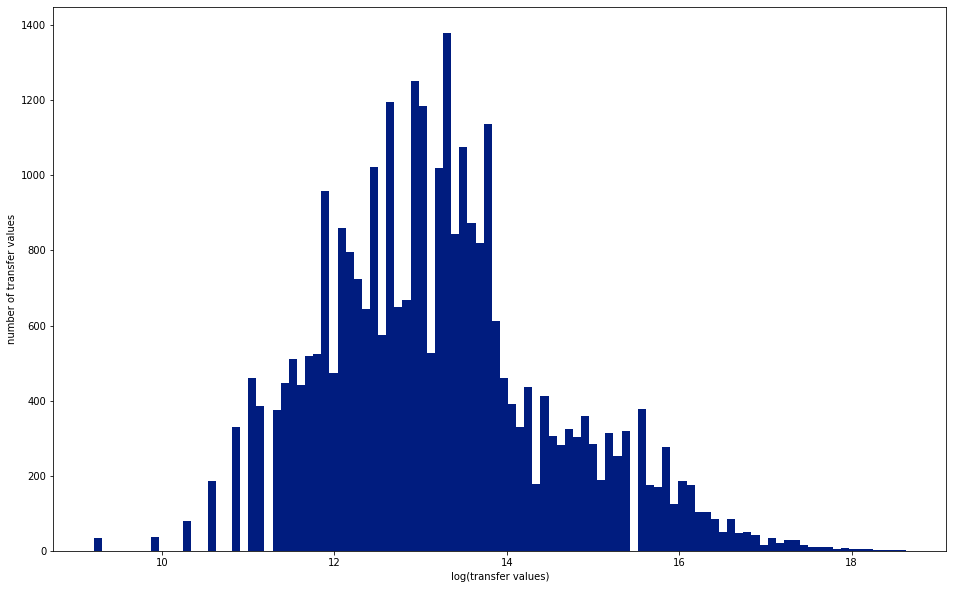

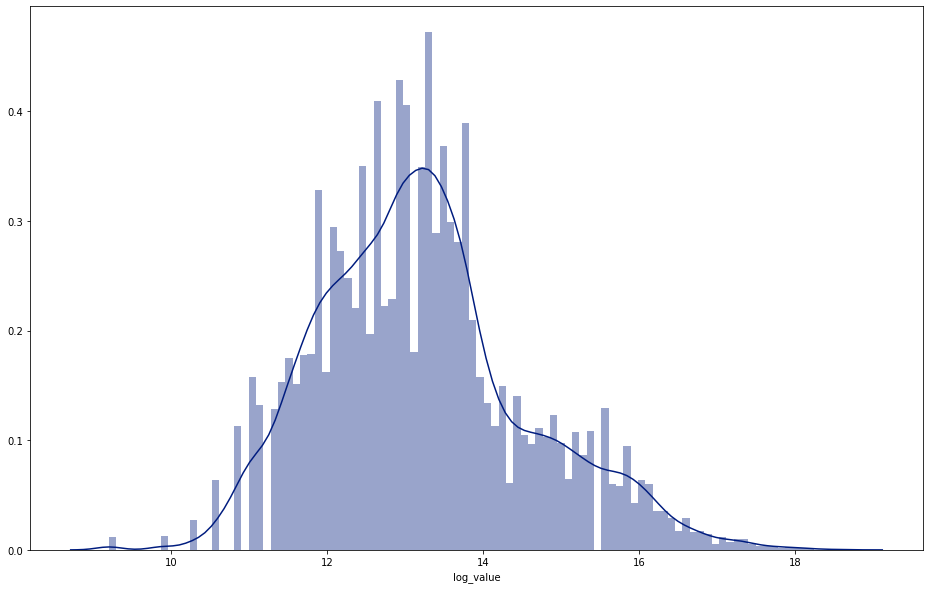

In [18]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_pca['log_value'] .values, bins=100)
plt.xlabel('log(transfer values)')
plt.ylabel('number of transfer values')
plt.show()
sns.distplot(df_pca['log_value'] , bins =100)

In [19]:
selection = nn_df.index.to_list()
selection

[68017,
 67923,
 67916,
 67986,
 67856,
 68007,
 68241,
 67884,
 67902,
 67952,
 67949,
 68137,
 67923,
 67920,
 67826,
 68042,
 67839,
 67993,
 67909,
 68023,
 67921,
 68058,
 68165,
 68189,
 68403,
 68791,
 68601,
 68041,
 68142,
 68282,
 67953,
 67917,
 68788,
 68169,
 67885,
 68102,
 50664,
 68139,
 52003,
 68668,
 69117,
 69201,
 70250,
 1614,
 68166,
 68536,
 407,
 68076,
 69275,
 68615,
 68463,
 68276,
 68683,
 68248,
 68463,
 35022,
 68683,
 68332,
 68344,
 68994,
 68507,
 68698,
 69223,
 68417,
 70809,
 67945,
 68844,
 69819,
 35023,
 70432,
 70943,
 53876,
 53848,
 55648,
 70632,
 70798,
 70763,
 71152,
 75594,
 73791,
 77151,
 76073,
 5855,
 39722,
 75402,
 55027,
 76201,
 72726,
 72855,
 79218,
 74843,
 59388,
 77421,
 73389,
 74521,
 76491,
 75504,
 76200,
 73467,
 74643,
 73051,
 62484,
 79535,
 75419,
 62167,
 11435,
 11720,
 77814,
 60852,
 79911,
 80711,
 81926,
 46740,
 63612,
 79720,
 80116,
 65463,
 15365,
 63899,
 80723,
 80760,
 81544,
 82188,
 81743,
 14964,
 157

In [20]:
from sklearn.model_selection import train_test_split


X = df_pca.drop(['log_value','value_eur', 'club', 'short_name'], axis=1)
y = df_pca[['log_value']]

In [21]:
X_selected = X.loc[selection]
y_selected = y.loc[selection]


# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [22]:
X_test = X_test.append(X_selected)
X_test = X_test.loc[~X_test.index.duplicated(keep='first')]
X_test = X_test.dropna()
X_test.loc[selection]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,pc1,pc2,pc3,pc4,pc5,pc6
68017,-6.171037,-2.191389,2.401160,-1.984273,1.133113,-0.360958
67923,-7.082572,-2.466070,2.409195,-1.065906,1.148686,0.023014
67916,-6.772345,-2.345889,1.780103,-1.925966,1.877153,-0.394646
67986,-5.936113,-3.278158,2.466489,1.701635,2.090047,0.282756
67856,-6.263293,-3.934364,1.930044,2.385647,2.476051,-0.223277
68007,-5.679887,-2.746835,1.912474,1.367323,2.226139,0.054532
68241,-5.947918,-3.262787,1.696915,2.045924,1.455504,-0.239528
67884,6.797862,-0.244053,2.481755,-1.220151,4.627056,0.109863
67902,7.102035,-0.284562,2.801905,-1.265803,4.319049,0.018858
67952,7.325360,-0.265433,2.781251,-0.932771,4.547424,0.139962


In [23]:
y_test = y_test.append(y_selected)
y_test = y_test.loc[~y_test.index.duplicated(keep='first')]
y_test = y_test.dropna()
y_test.loc[selection]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,log_value
68017,17.073607
67923,17.370859
67916,17.529083
67986,17.216708
67856,16.648724
68007,17.111347
68241,16.380460
67884,17.073607
67902,16.759950
67952,16.380460


In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.7702


In [26]:
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, pred))
print('Max Error: %.4f' % max_error(y_test, pred))
print('Mean Absolute Error: %.4f' % mean_absolute_error(y_test, pred))
print('Mean Squared Error: %.4f' % metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error: %.4f' %  np.sqrt(metrics.mean_squared_error(y_test, pred)))

Explained Variance Score: 0.7702
Max Error: 3.7325
Mean Absolute Error: 0.4973
Mean Squared Error: 0.4280
Root Mean Squared Error: 0.6542


In [27]:
df_xtest = pd.DataFrame(X_test)
df_xtest.rename(columns={df_xtest.columns[0]: "pc1", df_xtest.columns[1]: "pc2", df_xtest.columns[2]: "pc3", df_xtest.columns[3]: "pc4", df_xtest.columns[4]: "pc5", df_xtest.columns[5]: "pc6"}, inplace = True)

In [28]:
df_ytest = pd.DataFrame(y_test)

In [29]:
df_merged_features = pd.merge(df_xtest, df_ytest, left_index=True, right_index=True)

In [30]:
df_merged_features = df_merged_features.reset_index(drop=True)

In [31]:
pd.options.display.float_format = '{:,.2f}'.format
df_pred = pd.DataFrame({'Predicted Log': pred.flatten()})
df_pred['Predicted'] = np.exp(df_pred) - 1
df_pred.head()

,Predicted Log,Predicted
0,13.61,"817,285.51"
1,12.54,"280,653.74"
2,12.14,"186,934.62"
3,13.04,"462,286.71"
4,13.07,"475,120.73"


In [32]:
df_merged_pred = pd.merge(df_merged_features, df_pred, left_index=True, right_index=True)
df_merged_pred

,pc1,pc2,pc3,pc4,pc5,pc6,log_value,Predicted Log,Predicted
0,-2.31,1.38,0.96,0.40,-1.27,-0.41,13.35,13.61,"817,285.51"
1,1.61,1.30,-2.82,-0.10,0.81,-0.80,12.39,12.54,"280,653.74"
2,9.26,-1.22,0.23,-0.24,0.64,-0.18,12.83,12.14,"186,934.62"
3,8.16,-0.77,0.88,0.57,1.54,-0.50,14.22,13.04,"462,286.71"
4,-0.68,-0.38,-1.02,0.98,0.07,-0.35,12.39,13.07,"475,120.73"
5,-1.92,-0.28,-1.66,-0.26,1.00,-0.21,13.17,13.74,"922,846.81"
6,-0.65,2.74,0.32,-0.60,0.18,-0.63,13.22,14.06,"1,282,801.44"
7,-2.87,-2.52,1.91,-1.05,-0.08,-0.66,14.22,14.75,"2,545,751.64"
8,-0.11,-1.57,2.68,-0.60,-2.18,-0.54,13.82,13.34,"621,790.52"
9,-1.90,1.58,-0.27,0.07,-0.33,-0.09,13.49,13.62,"824,085.47"


In [33]:
df_predictions = pd.merge(df_merged_pred, df_pca, how='left', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'log_value'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'log_value']).sort_values(by=['log_value'], ascending=False)
df_predictions

,pc1,pc2,pc3,pc4,pc5,pc6,log_value,Predicted Log,Predicted,value_eur,short_name,club
4607,-8.49,-3.39,2.16,0.17,2.97,-0.22,18.35,17.45,"37,977,079.10",93000000,E. Hazard,Chelsea
6203,-7.83,-1.84,2.23,2.29,2.67,-0.02,18.11,17.01,"24,353,360.96",73500000,C. Eriksen,Tottenham Hotspur
4611,4.49,-0.19,3.31,-0.59,5.30,0.45,18.09,17.08,"26,287,199.53",72000000,De Gea,Manchester United
3328,-8.96,0.17,1.13,1.44,3.43,0.30,18.02,17.43,"37,080,425.62",67000000,L. Modrić,Real Madrid
3707,-5.41,-2.05,3.76,-3.43,1.07,-0.63,17.98,16.99,"23,875,671.93",64500000,M. Icardi,Inter
4912,-6.45,-1.15,4.85,-1.67,0.11,-0.26,17.95,16.92,"22,219,922.38",62500000,R. Lukaku,Manchester United
1620,6.35,-0.47,3.27,-1.02,4.77,0.26,17.94,16.45,"13,994,146.25",62000000,T. Courtois,Real Madrid
2792,6.65,0.42,4.23,-1.12,4.82,0.28,17.88,16.88,"21,524,568.79",58000000,M. ter Stegen,FC Barcelona
3463,-6.90,-2.46,2.86,-1.86,1.56,-0.24,17.74,16.95,"23,080,183.82",50500000,P. Aubameyang,Arsenal
6130,-7.36,-2.64,2.42,-0.34,1.79,-0.39,17.73,16.78,"19,461,602.07",50000000,N. Fekir,Olympique Lyonnais


In [34]:
neighbors = df_pca.loc[[68017,
 67923,
 67916,
 67986,
 67856,
 68007,
 68241,
 67884,
 67902,
 67952,
 67949,
 68137,
 67923,
 67920,
 67826,
 68042,
 67839,
 67993,
 67909,
 68023,
 67921,
 68058,
 68165,
 68189,
 68403,
 68791,
 68601,
 68041,
 68142,
 68282,
 67953,
 67917,
 68788,
 68169,
 67885,
 68102,
 50664,
 68139,
 52003,
 68668,
 69117,
 69201,
 70250,
 1614,
 68166,
 68536,
 407,
 68076,
 69275,
 68615,
 68463,
 68276,
 68683,
 68248,
 68463,
 35022,
 68683,
 68332,
 68344,
 68994,
 68507,
 68698,
 69223,
 68417,
 70809,
 67945,
 68844,
 69819,
 35023,
 70432,
 70943,
 53876,
 53848,
 55648,
 70632,
 70798,
 70763,
 71152,
 75594,
 73791,
 77151,
 76073,
 5855,
 39722,
 75402,
 55027,
 76201,
 72726,
 72855,
 79218,
 74843,
 59388,
 77421,
 73389,
 74521,
 76491,
 75504,
 76200,
 73467,
 74643,
 73051,
 62484,
 79535,
 75419,
 62167,
 11435,
 11720,
 77814,
 60852,
 79911,
 80711,
 81926,
 46740,
 63612,
 79720,
 80116,
 65463,
 15365,
 63899,
 80723,
 80760,
 81544,
 82188,
 81743,
 14964,
 15710,
 84615,
 83821,
 16800]]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


In [35]:
predictions = pd.merge(df_predictions, neighbors, how='right', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club', 'log_value'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club', 'log_value']).sort_values(by=['log_value'], ascending=False)

In [36]:
scouting_report_pred = pd.merge(predictions, nn_df, how='right', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club'])
scouting_report_pred = scouting_report_pred.dropna()
scouting_report_pred.sort_values(by=['transfer'])

,pc1,pc2,pc3,pc4,pc5,pc6,log_value,Predicted Log,Predicted,value_eur,short_name,club,transfer
66,-2.67,-2.61,1.42,0.72,1.00,-0.47,15.52,14.89,"2,937,542.59","5,500,000.00",A. Miranchuk,Lokomotiv Moscow,A. Iwobi
80,-2.69,-2.50,0.60,0.01,1.28,-0.45,14.46,14.81,"2,704,041.23","1,900,000.00",F. Lecarnado,CD Palestino,A. Iwobi
74,-2.81,-2.52,0.68,0.08,0.95,-0.51,14.91,14.67,"2,344,928.43","3,000,000.00",L. Cinterio,Deportes Iquique,A. Iwobi
71,-2.81,-2.56,0.75,0.05,1.02,-0.48,15.15,14.74,"2,515,089.87","3,800,000.00",Gustavo Lobateiro,Internacional,A. Iwobi
7,-7.08,-2.47,2.41,-1.07,1.15,0.02,17.37,16.46,"14,143,666.62","35,000,000.00",M. Depay,Olympique Lyonnais,A. Lacazette
6,-7.08,-2.47,2.41,-1.07,1.15,0.02,17.37,16.46,"14,143,666.62","35,000,000.00",M. Depay,Olympique Lyonnais,A. Lacazette
29,-6.71,-1.83,2.04,-1.33,1.65,-0.35,16.59,16.59,"16,049,719.37","16,000,000.00",K. Gameiro,Valencia CF,A. Lacazette
2,-6.62,-2.06,1.84,-1.72,1.34,-0.32,17.39,16.36,"12,690,951.66","35,500,000.00",A. Martial,Manchester United,A. Lacazette
91,-3.46,0.24,-0.51,0.49,1.18,-0.12,13.82,14.54,"2,071,167.30","1,000,000.00",Fábio Nunes,CD Tondela,A. Maitland-Niles
87,-3.25,0.20,-0.22,0.97,0.84,-0.25,14.00,14.36,"1,726,154.43","1,200,000.00",G. Hamer,PEC Zwolle,A. Maitland-Niles


In [37]:
scouting_actual_pred = scouting_report_pred[['Predicted', 'value_eur', 'short_name', 'transfer']]
scouting_actual_pred = scouting_actual_pred.rename(columns={"value_eur": "Actual", 'short_name': 'Name', 'transfer':'Transfer'})
scouting_actual_pred = scouting_actual_pred.set_index('Name')
scouting_actual_pred = scouting_actual_pred.drop_duplicates()
scouting_actual_pred.sort_values(by=['Transfer'])

,Predicted,Actual,Transfer
Name,,,
A. Miranchuk,"2,937,542.59","5,500,000.00",A. Iwobi
Gustavo Lobateiro,"2,515,089.87","3,800,000.00",A. Iwobi
F. Lecarnado,"2,704,041.23","1,900,000.00",A. Iwobi
L. Cinterio,"2,344,928.43","3,000,000.00",A. Iwobi
K. Gameiro,"16,049,719.37","16,000,000.00",A. Lacazette
A. Martial,"12,690,951.66","35,500,000.00",A. Lacazette
M. Depay,"14,143,666.62","35,000,000.00",A. Lacazette
Fábio Nunes,"2,071,167.30","1,000,000.00",A. Maitland-Niles
G. Hamer,"1,726,154.43","1,200,000.00",A. Maitland-Niles


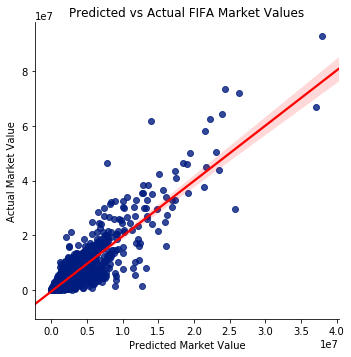

In [38]:
lm = sns.lmplot(x="Predicted", y="value_eur", data=df_predictions, line_kws={'color': 'red'}, fit_reg=True)

# Get hold of the `Axes` objects
axes = lm.ax

plt.title('Predicted vs Actual FIFA Market Values')

# Set x-axis label
plt.xlabel('Predicted Market Value')
# Set y-axis label
plt.ylabel('Actual Market Value')

# Show the plot
plt.show()

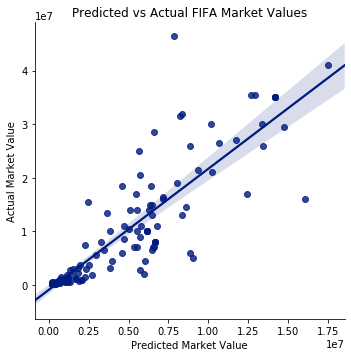

In [39]:
lm = sns.lmplot(x="Predicted", y="value_eur", data=scouting_report_pred)

# Get hold of the `Axes` objects
axes = lm.ax

plt.title('Predicted vs Actual FIFA Market Values')

# Set x-axis label
plt.xlabel('Predicted Market Value')
# Set y-axis label
plt.ylabel('Actual Market Value')

# Show the plot
plt.show()

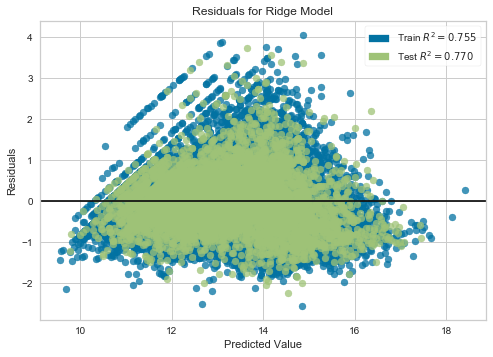

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()

visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()             # Finalize and render the figure

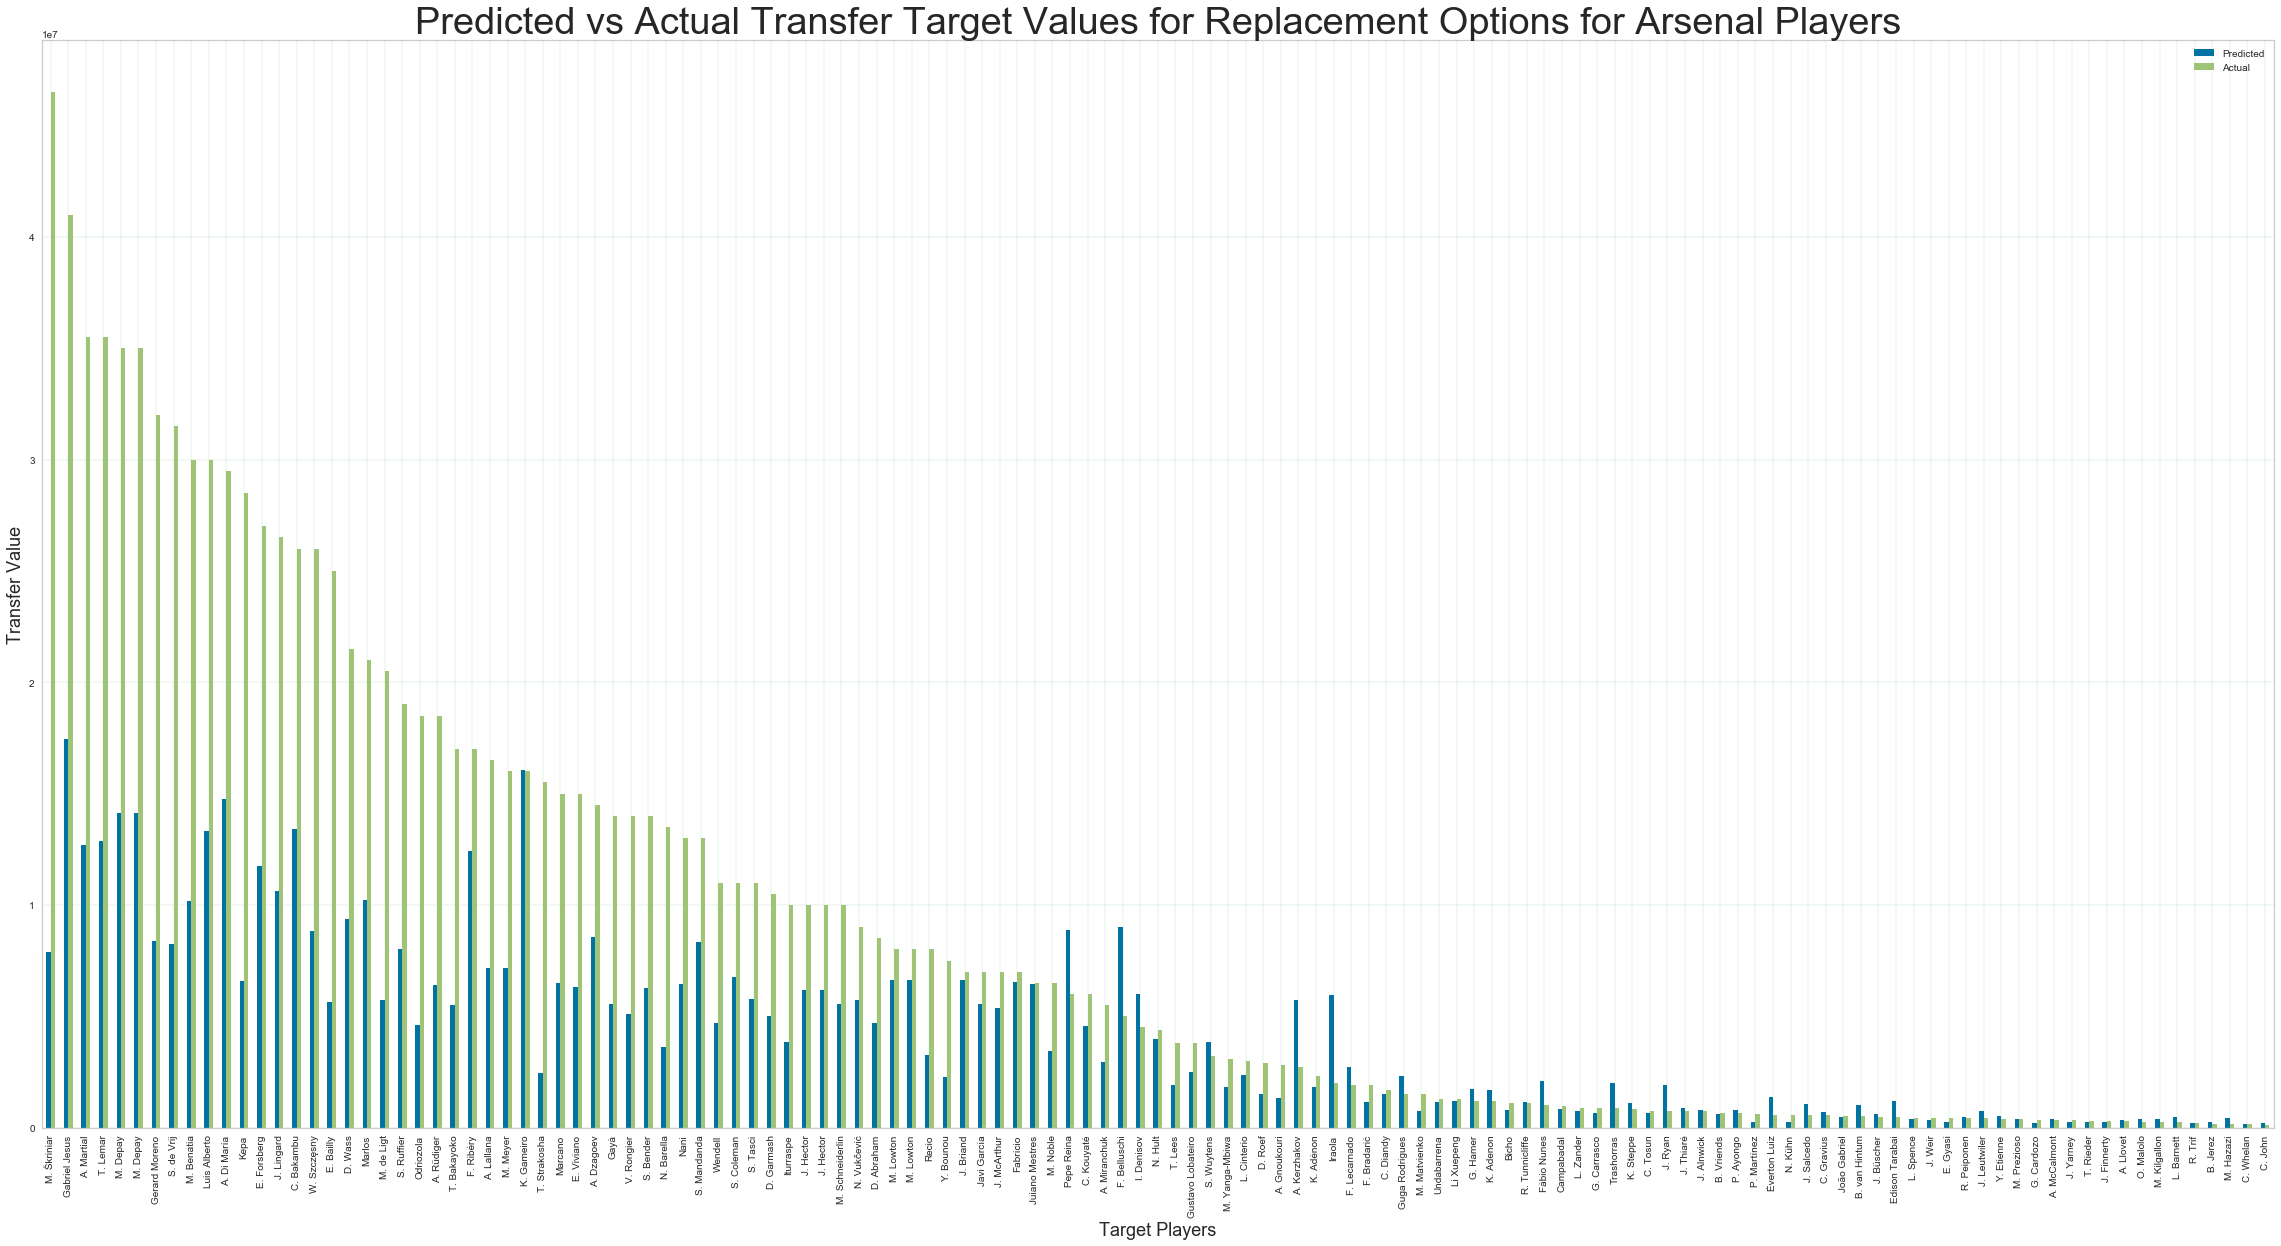

In [41]:
scouting_actual_pred.plot(kind='bar',figsize=(40,20))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.ylabel('Transfer Value', fontsize=18)
plt.xlabel('Target Players', fontsize=18)
plt.title('Predicted vs Actual Transfer Target Values for Replacement Options for Arsenal Players', fontsize=38)
plt.show()

In [42]:
import xgboost as xgb
Train_Master = df_pca.drop(['value_eur', 'club', 'short_name'], axis=1)
Test_Master = df_pca.drop(['log_value','value_eur', 'club', 'short_name'], axis=1)

In [43]:
Train_Master.shape, Test_Master.shape

((31023, 7), (31023, 6))

In [44]:
Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [45]:
X_train = Train.drop(['log_value'], axis=1)
Y_train = Train["log_value"]
X_test = Test.drop(['log_value'], axis=1)
Y_test = Test["log_value"]

In [46]:
Test_Selection = Test_Master.loc[Test_Master.index.isin(selection)]

In [47]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_Selection)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [48]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:6.44869	valid-rmse:6.47513
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:3.27928	valid-rmse:3.29739
[2]	train-rmse:1.7342	valid-rmse:1.7517
[3]	train-rmse:1.02193	valid-rmse:1.04395
[4]	train-rmse:0.716983	valid-rmse:0.74412
[5]	train-rmse:0.610007	valid-rmse:0.643278
[6]	train-rmse:0.575577	valid-rmse:0.612527
[7]	train-rmse:0.557179	valid-rmse:0.599788
[8]	train-rmse:0.551597	valid-rmse:0.596424
[9]	train-rmse:0.546738	valid-rmse:0.592676
Modeling RMSLE 0.59268


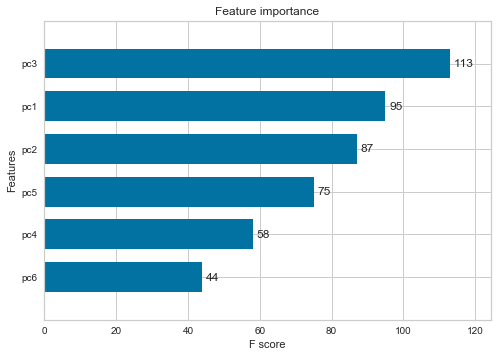

In [49]:
xgb.plot_importance(model, max_num_features=28, height=0.7)

In [50]:
pred = model.predict(dtest)
pred = np.exp(pred) - 1

In [51]:
Test_Selection = Test_Selection.reset_index()

In [52]:
df_test = pd.concat([Test_Selection, pd.DataFrame(pred, columns=['pred_value'])], axis=1)
df_test

,index,pc1,pc2,pc3,pc4,pc5,pc6,pred_value
0,5855,-3.33,0.60,-0.64,0.56,1.48,-0.24,"2,572,046.75"
1,11435,-0.30,-3.79,-0.09,-1.59,0.22,-0.44,"1,020,974.81"
2,11720,-0.26,-3.67,0.30,-2.07,0.33,-0.96,"1,019,623.25"
3,14964,3.10,2.41,-0.59,-0.09,-0.77,-0.58,"377,809.06"
4,15365,-0.44,-0.03,-1.55,0.82,0.05,-0.91,"264,768.31"
5,15710,1.73,0.94,-1.83,-0.49,-0.56,-0.32,"244,789.11"
6,16800,1.33,0.39,-2.20,-0.66,-0.11,-0.52,"161,629.89"
7,35022,-5.16,2.32,0.95,0.56,1.20,-0.33,"7,801,802.00"
8,35023,-5.05,-1.67,2.34,-1.59,0.10,-0.61,"9,127,740.00"
9,39722,-3.46,0.24,-0.51,0.49,1.18,-0.12,"2,488,542.50"


In [53]:
df_pred_xg = pd.merge(df_test, df_pca, how='left', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']).sort_values(by=['value_eur'], ascending=False)
df_pred_xg['value_eur'] = df_pred_xg['value_eur'].astype('float')

In [54]:
df_pred_xg = pd.merge(nn_df, df_pred_xg, how='left', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club'])
xg_scouting_report = df_pred_xg[['short_name', 'club', 'transfer', 'pred_value', 'value_eur']]

In [64]:
xg_scouting_report.rename(columns = {'short_name':'Target', 'club':'Club','transfer':'Arsenal Player', 'pred_value':'Predicted Value', 'value_eur':'FIFA Value'}, inplace = True) 
xg_scouting_report['FIFA Value'] = xg_scouting_report['FIFA Value'].astype(float)
xg_scouting_report = xg_scouting_report.dropna()
xg_scouting_report = xg_scouting_report.sort_values('FIFA Value').drop_duplicates(subset=['Target', 'Arsenal Player'], keep='first')
xg_scouting_report.sort_values('Arsenal Player')

,Target,Club,Arsenal Player,Predicted Value,FIFA Value
72,L. Cinterio,Deportes Iquique,A. Iwobi,"3,044,673.50","3,000,000.00"
69,A. Miranchuk,Lokomotiv Moscow,A. Iwobi,"2,856,343.50","5,500,000.00"
70,Gustavo Lobateiro,Internacional,A. Iwobi,"3,044,673.50","3,800,000.00"
71,F. Lecarnado,CD Palestino,A. Iwobi,"2,856,343.50","1,900,000.00"
13,A. Martial,Manchester United,A. Lacazette,"14,006,984.00","35,500,000.00"
12,M. Depay,Olympique Lyonnais,A. Lacazette,"25,078,640.00","35,000,000.00"
11,K. Gameiro,Valencia CF,A. Lacazette,"25,282,664.00","16,000,000.00"
81,J. Ryan,Blackpool,A. Maitland-Niles,"2,072,539.62","725,000.00"
83,Fábio Nunes,CD Tondela,A. Maitland-Niles,"2,488,542.50","1,000,000.00"
84,G. Hamer,PEC Zwolle,A. Maitland-Niles,"1,847,444.88","1,200,000.00"


In [65]:
sklearn_scouting_report = scouting_report_pred[['short_name', 'club', 'transfer', 'Predicted', 'value_eur']]
sklearn_scouting_report.rename(columns = {'short_name':'Target', 'club':'Club','transfer':'Arsenal Player', 'pred_value':'Predicted Value', 'value_eur':'FIFA Value'}, inplace = True) 
sklearn_scouting_report = sklearn_scouting_report.dropna()
sklearn_scouting_report = sklearn_scouting_report.sort_values('FIFA Value').drop_duplicates(subset=['Target', 'Arsenal Player'], keep='first')
sklearn_scouting_report.sort_values('Arsenal Player')

,Target,Club,Arsenal Player,Predicted,FIFA Value
74,L. Cinterio,Deportes Iquique,A. Iwobi,"2,344,928.43","3,000,000.00"
71,Gustavo Lobateiro,Internacional,A. Iwobi,"2,515,089.87","3,800,000.00"
66,A. Miranchuk,Lokomotiv Moscow,A. Iwobi,"2,937,542.59","5,500,000.00"
80,F. Lecarnado,CD Palestino,A. Iwobi,"2,704,041.23","1,900,000.00"
2,A. Martial,Manchester United,A. Lacazette,"12,690,951.66","35,500,000.00"
7,M. Depay,Olympique Lyonnais,A. Lacazette,"14,143,666.62","35,000,000.00"
29,K. Gameiro,Valencia CF,A. Lacazette,"16,049,719.37","16,000,000.00"
98,J. Ryan,Blackpool,A. Maitland-Niles,"1,904,390.74","725,000.00"
91,Fábio Nunes,CD Tondela,A. Maitland-Niles,"2,071,167.30","1,000,000.00"
87,G. Hamer,PEC Zwolle,A. Maitland-Niles,"1,726,154.43","1,200,000.00"


In [66]:
xg_scouting_report.to_csv('xg_scouting_report.csv')

In [67]:
sklearn_scouting_report.to_csv('sklearn_scouting_report.csv')